# ขั้นตอนที่ 1: Access Twitter API keys

* สร้างบัญชี Twitter เพื่อใช้ในการ
* Login เข้าสู่เว็บไซต์ https://apps.twitter.com/
* เลือก "Create New App"
* กรอกข้อมูลในแบบฟอร์ม และยอมรับข้อตกลงการใช้งาน จากนั้นเลือก "Create your Twitter application"
* ในหน้าถัดไป เลือกแถบ "API keys" จากนั้นคัดลอก "API key" และ "API secret"
* เลือก "Create my access token" จากนั้นทำการคัดลอก "Access token" และ "Access token secret"

In [ ]:
# Variables that contains the user credentials to access Twitter API
access_token = "370176271-UDHMCcE25NrsDiET46WWr9XtaNGNEwVRb1127AtG"
access_token_secret = "olT1krXMttfo6LwT0vYaFj9hXTa8ZCaLz5kJmLpk18DKw"
consumer_key = "2kn42UEsLSsmuIy14ZkNyPt7C"
consumer_secret = "Q1ysT9ORhEj9X72tF8fwUVQRCquNX5TnQfmou9Ga4XWcx6yN6C"

# ขั้นตอนที่ 2 : เชื่อมต่อกับ Twitter Streaming API และดาวน์โหลดข้อมูล
เราจะใช้ Tweepy ซึ่งเป็น Library ของ Python ในการเชื่อมต่อกับ Twitter Streaming API และทำการดาวน์โหลดข้อมูลเพื่อเขียนลงในไฟล์ "tweets.json"

หากคุณไม่มี Tweepy สามารถดาวน์โหลดได้จาก https://github.com/tweepy/tweepy และทำการ Install ด้วยคำสั่ง [ python setup.py install ]

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json

#This is a basic listener that just prints received tweets to stdout.
class MyListener(StreamListener):

    def on_data(self, data):
        try:
            with open('tweets.json', 'a') as f:
                f.write(data)
                dat = json.loads(data)
                print "%s %s" % (dat['created_at'], dat['text'])
                return True
        except BaseException as e:
            print("--> Error on_data: %s" % str(e))
            pass
        return True

    def on_error(self, status):
        print status

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    twitter_stream = Stream(auth, MyListener())

    #This line filter Twitter Streams to capture data by the keywords(Brands of smartphone) 
    twitter_stream.filter(track=['iPhone', 'Samsung Galaxy', 'Google Pixel', 'OnePlus', 'Google Nexus', 'LG G5', 'HTC', 'Huawei', 'Motorola Moto Play'])

    

ทำการอ่านข้อมูลและเก็บใส่ในตัวแปรชนิดอาเรย์ที่ชื่อ tweets_data

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys
tweets_data_path = 'C:\\Users\\knotsupavit\\Desktop\\tweets_2.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print e
        continue
print "\n%s tweets read." % (count)

......................................................................
......................................................................
......................................................................
............................................
25404 tweets read.


# ขั้นตอนที่ 3 : จัดการโครงสร้างของข้อมูล
ทำการติด label ให้แต่ละทวีตเพื่อง่ายต่อการนำไปใช้งาน

สร้างตัวแปร **tweets** โดยมีโครงสร้างเป็น Dataframe เพื่อลดความซับซ้อนในการจัดการข้อมูล โดยใช้คำสั่งต่อไปนี้

In [2]:
tweets = pd.DataFrame()
print tweets

Empty DataFrame
Columns: []
Index: []


ขั้นตอนถัดไป ทำการเพิ่มคอลัมน์ *text* เพื่อใส่เนื้อหาในแต่ละทวีต, *lang* เพื่อใส่ภาษาที่ใช้ในการเขียนทวีตนั้นๆ และ *country* เพื่อใส่ข้อมูลว่าทวีตนั้นๆมาจากประเทศอะไร

In [3]:
tweets['text'] = map(lambda tweet: tweet.get('text', None), tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)
tweets['country'] = map(lambda tweet: tweet['user']['location'] if tweet.get('user') != None else None, tweets_data)
tweets.head(1000)

text lang  \
0    DACOM Armor Bluetooth Earphone Stereo Headset ...   en   
1    RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
2    https://t.co/h2RKhHinDC HUGE IPHONE 7 GIVEAWAY...   en   
3    Apple iPhone 4s - 16GB - Black (Unlocked) Veri...   en   
4    LED Light Up Selfie Luminous Phone Back Case C...   en   
5    Like a bitch? !  Push,don't be shy    https://...   en   
6    RT @davidfrum: So the Russians voted for Trump...   en   
7    Google Pixel XL International Giveaway @androi...   en   
8    https://t.co/C1VU3YPpch HUGE IPHONE 7 GIVEAWAY...   en   
9    LED Light Up Selfie Luminous Phone Back Case C...   en   
10   Apple iPhone 4 8GB Black (AT&amp;T) (MD127LL/A...   en   
11   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
12   Samsung Galaxy S7 EDGE - https://t.co/YuIxqjpe...   en   
13   Samsung's Note7 kill-switch is deeply disturbi...   en   
14   RT @ThisJustTweets: Google, HTC and Oculus tea...   en   
15     RT @Crayune: Iphone 7 ? https://t.co/E8kyZceIQs   en   
16   I want to win a new OnePlus 3T from XDA-Develo...   en   
17   RT @MaywardEnbers: Lucky three suns for huawei...   en   
18   Huawei Watch disappears from the Google Store,...   en   
19   This is the iPhone VR headset you've been wait...   en   
20   RT @krixz6339: Superb elements \nDrone \nBackp...   en   
21   RT @sprint: #SprintSnowSweepstakes is 🌨 prize...   en   
22   OnePlus 3T comes in 64GB version in Gun Metal ...   en   
23   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
24   RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
25   RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
26   RT @MaywardEnbers: Lucky three suns for huawei...   en   
27   RT @seanmdav: No generation in history could p...   en   
28   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
29   LED Light Up Selfie Luminous Phone Back Case C...   en   
..                                                 ...  ...   
970           Check Out! -&gt; https://t.co/HOIYHQrKcX   en   
971  Cyrano lets you smell what’s on your #iPhone #...   en   
972  RT @blogosum: Turn your iPhone into 2 sim mobi...   en   
973  San Bernardino Shooter’s iCloud Password Chang...   en   
974  DNR_CREW: RT xDiiThy: I just joined an iPhone ...   en   
975  RT @MaywardEnbers: Lucky three suns for huawei...   en   
976  DNR_CREW: RT GiveawayCrib: HUGE IPHONE 7 GIVEA...   en   
977           Check Out! -&gt; https://t.co/rdua8Bch2d   en   
978  RT @PandoraDibello: Google Is All Set To Launc...   en   
979  DNR_CREW: RT GiveawayCrib: HUGE IPHONE 7 GIVEA...   en   
980  Xbox, PS4, iPhone7\nhttps://t.co/OuY6SMkBZ8\n\...   en   
981  RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
982  COOLNUT C3DVRG-7 VR Glasses for iPhone 6s/6 pl...   en   
983  RT @Toafhun: Brown iPhone 6 / 6s Silicone Case...   en   
984           Check Out! -&gt; https://t.co/yJ4x0uEmgN   en   
985           Check Out! -&gt; https://t.co/zd9PhUf3DP   en   
986  RT @GiveawayCrib: HUGE IPHONE 7 GIVEAWAY, ENTE...   en   
987  Google Pixel XL International Giveaway @androi...   en   
988  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
989  RT @MayWardDgte: Cagayan De Oro pipz in SM for...   en   
990  RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
991  Google Pixel XL International Giveaway @androi...   en   
992  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
993  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
994  NEW VICTORIA'S SECRET VS RED LIPS HEARTS LIPST...   en   
995  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
996  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
997  RT @PandoraDibello: Google Is All Set To Launc...   en   
998  RT @Batmanlai_b: iPhone 6&amp;amp;7 power bank...   en   
999  RT TechGiveaways_: 💶 IPHONE 6 &amp; 6+\n💶 RT...   en   

                            country  
0                     Manhattan, NY  
1                     Mumbai, India  
2                              N

ขั้นตอนถัดมา ทำการสร้างกราฟที่แสดงผล 20 ประเทศที่ทำการทวีตมากที่สุดจากข้อมูลที่เก็บ

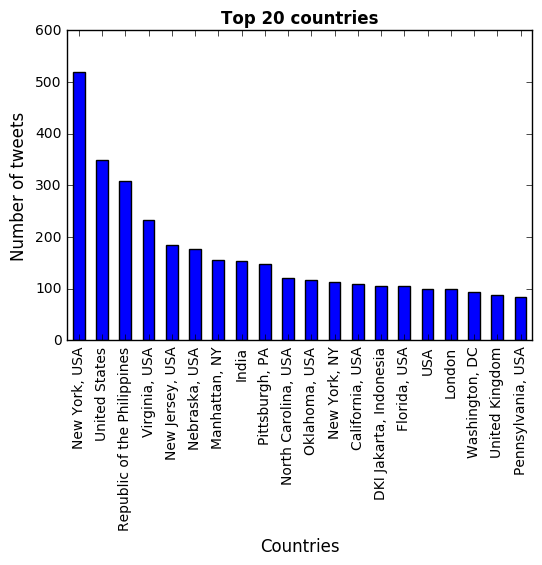

In [4]:
%matplotlib inline
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Number of tweets' , fontsize=12)
ax.set_title('Top 20 countries', fontsize=12, fontweight='bold')
tweets_by_country[:20].plot(ax=ax, kind='bar', color='blue')

# ขั้นตอนที่ 4 : สกัดข้อมูลที่ต้องการศึกษา

สร้างฟังก์ชัน **word_in_text** ที่ใช้ในการทำ String Matching โดยฟังก์ชันนี้จะ return True เมื่อพบ word ใน text, กรณีอื่นๆทำการ return False

In [5]:
import re
def word_in_text(word, text):
    try:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return 1
        return 0
    except:
        return 0


ใช้ฟังก์ชัน **word_in_text** ในการค้นหาแต่ละทวีตว่ามี keywords ที่ต้องการอยู่หรือไม่ 

In [6]:
tweets['iPhone'] = tweets['text'].apply(lambda tweet: word_in_text('iPhone 7', tweet))
tweets['Samsung'] = tweets['text'].apply(lambda tweet: word_in_text('Samsung Galaxy',tweet))
tweets['Google Pixel'] = tweets['text'].apply(lambda tweet: word_in_text('Google Pixel', tweet))
tweets['OnePlus'] = tweets['text'].apply(lambda tweet: word_in_text('OnePlus', tweet))
tweets['Google Nexus'] = tweets['text'].apply(lambda tweet: word_in_text('Google Nexus',tweet))
tweets['LG'] = tweets['text'].apply(lambda tweet: word_in_text('LG', tweet))
tweets['HTC'] = tweets['text'].apply(lambda tweet: word_in_text('HTC',tweet))
tweets['Huawei'] = tweets['text'].apply(lambda tweet: word_in_text('Huawei', tweet))
tweets.head(1000)

text lang  \
0    DACOM Armor Bluetooth Earphone Stereo Headset ...   en   
1    RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
2    https://t.co/h2RKhHinDC HUGE IPHONE 7 GIVEAWAY...   en   
3    Apple iPhone 4s - 16GB - Black (Unlocked) Veri...   en   
4    LED Light Up Selfie Luminous Phone Back Case C...   en   
5    Like a bitch? !  Push,don't be shy    https://...   en   
6    RT @davidfrum: So the Russians voted for Trump...   en   
7    Google Pixel XL International Giveaway @androi...   en   
8    https://t.co/C1VU3YPpch HUGE IPHONE 7 GIVEAWAY...   en   
9    LED Light Up Selfie Luminous Phone Back Case C...   en   
10   Apple iPhone 4 8GB Black (AT&amp;T) (MD127LL/A...   en   
11   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
12   Samsung Galaxy S7 EDGE - https://t.co/YuIxqjpe...   en   
13   Samsung's Note7 kill-switch is deeply disturbi...   en   
14   RT @ThisJustTweets: Google, HTC and Oculus tea...   en   
15     RT @Crayune: Iphone 7 ? https://t.co/E8kyZceIQs   en   
16   I want to win a new OnePlus 3T from XDA-Develo...   en   
17   RT @MaywardEnbers: Lucky three suns for huawei...   en   
18   Huawei Watch disappears from the Google Store,...   en   
19   This is the iPhone VR headset you've been wait...   en   
20   RT @krixz6339: Superb elements \nDrone \nBackp...   en   
21   RT @sprint: #SprintSnowSweepstakes is 🌨 prize...   en   
22   OnePlus 3T comes in 64GB version in Gun Metal ...   en   
23   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
24   RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
25   RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
26   RT @MaywardEnbers: Lucky three suns for huawei...   en   
27   RT @seanmdav: No generation in history could p...   en   
28   RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
29   LED Light Up Selfie Luminous Phone Back Case C...   en   
..                                                 ...  ...   
970           Check Out! -&gt; https://t.co/HOIYHQrKcX   en   
971  Cyrano lets you smell what’s on your #iPhone #...   en   
972  RT @blogosum: Turn your iPhone into 2 sim mobi...   en   
973  San Bernardino Shooter’s iCloud Password Chang...   en   
974  DNR_CREW: RT xDiiThy: I just joined an iPhone ...   en   
975  RT @MaywardEnbers: Lucky three suns for huawei...   en   
976  DNR_CREW: RT GiveawayCrib: HUGE IPHONE 7 GIVEA...   en   
977           Check Out! -&gt; https://t.co/rdua8Bch2d   en   
978  RT @PandoraDibello: Google Is All Set To Launc...   en   
979  DNR_CREW: RT GiveawayCrib: HUGE IPHONE 7 GIVEA...   en   
980  Xbox, PS4, iPhone7\nhttps://t.co/OuY6SMkBZ8\n\...   en   
981  RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
982  COOLNUT C3DVRG-7 VR Glasses for iPhone 6s/6 pl...   en   
983  RT @Toafhun: Brown iPhone 6 / 6s Silicone Case...   en   
984           Check Out! -&gt; https://t.co/yJ4x0uEmgN   en   
985           Check Out! -&gt; https://t.co/zd9PhUf3DP   en   
986  RT @GiveawayCrib: HUGE IPHONE 7 GIVEAWAY, ENTE...   en   
987  Google Pixel XL International Giveaway @androi...   en   
988  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
989  RT @MayWardDgte: Cagayan De Oro pipz in SM for...   en   
990  RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
991  Google Pixel XL International Giveaway @androi...   en   
992  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
993  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
994  NEW VICTORIA'S SECRET VS RED LIPS HEARTS LIPST...   en   
995  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
996  RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
997  RT @PandoraDibello: Google Is All Set To Launc...   en   
998  RT @Batmanlai_b: iPhone 6&amp;amp;7 power bank...   en   
999  RT TechGiveaways_: 💶 IPHONE 6 &amp; 6+\n💶 RT...   en   

                            country  iPhone  Samsung  Google Pixel  OnePlus  \
0                     Manhattan, NY       0        0             0 

แสดงความถี่ของแต่ละ keywords ที่พบจากข้อมูลทั้งหมดที่เก็บมา

In [7]:
print "iPhone: " + str(tweets['iPhone'].value_counts()[1])
print "Samsung: " +  str(tweets['Samsung'].value_counts()[1])
print "Google Pixel: " + str(tweets['Google Pixel'].value_counts()[1])
print "OnePlus: " + str(tweets['OnePlus'].value_counts()[1])
print "Google Nexus: " + str(tweets['Google Nexus'].value_counts()[1])
print "LG: " + str(tweets['LG'].value_counts()[1])
print "HTC: " + str(tweets['HTC'].value_counts()[1])
print "Huawei: " + str(tweets['Huawei'].value_counts()[1])

iPhone: 2599
Samsung: 2080
Google Pixel: 952
OnePlus: 1744
Google Nexus: 149
LG: 489
HTC: 502
Huawei: 2125


นำความถี่ที่ได้มาแสดงผลในรูปแบบกราฟแท่ง

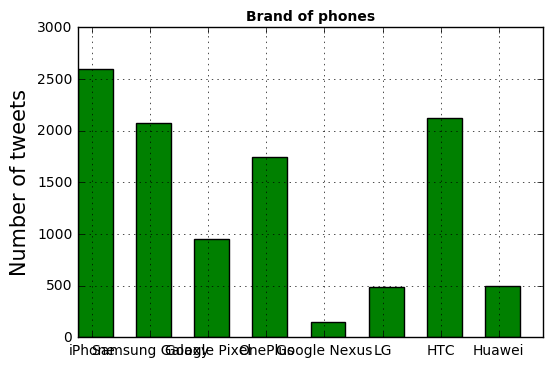

In [8]:
%matplotlib inline
keywords = ['iPhone', 'Samsung Galaxy', 'Google Pixel', 'OnePlus', 'Google Nexus', 'LG', 'HTC', 'Huawei']
tweets_by_keywords = [tweets['iPhone'].value_counts()[1], \
    tweets['Samsung'].value_counts()[1], \
    tweets['Google Pixel'].value_counts()[1], \
    tweets['OnePlus'].value_counts()[1], \
    tweets['Google Nexus'].value_counts()[1], \
    tweets['LG'].value_counts()[1], \
    tweets['Huawei'].value_counts()[1], \
    tweets['HTC'].value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_keywords, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Brand of phones',\
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(keywords)
plt.grid()

นำความถี่ที่ได้มาแสดงผลในรูปแบบ Pie Chart

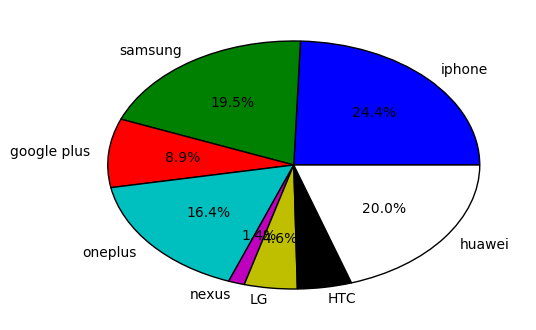

In [9]:
iphone = tweets['iPhone'].value_counts()[1]
samsung = tweets['Samsung'].value_counts()[1]
google =  tweets['Google Pixel'].value_counts()[1]
oneplus =  tweets['OnePlus'].value_counts()[1]
nexus =  tweets['Google Nexus'].value_counts()[1]
lg = tweets['LG'].value_counts()[1]
htc = tweets['HTC'].value_counts()[1]
huawei = tweets['Huawei'].value_counts()[1] 
lbls = ['iphone', 'samsung', 'google plus', 'oneplus', 'nexus', 'LG', 'HTC', 'huawei']
sizes = [iphone,samsung,google,oneplus,nexus,lg,htc,huawei]
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

สร้างฟังก์ชัน **extract_link** ที่ใช้ในการตัดลิงค์ออกจากข้อความ โดยฟังก์ชันนี้จะ return ลิงค์ เมื่อสามารถตัดได้และเป็น unicode, กรณีตัดไม่ได้จะ return "not match, ส่วนกรณีไม่ใช่ unicode จะ return "wrong type"

In [10]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    if type(text) == unicode:
        match = re.search(regex, text)
        if match:
            return match.group()
        else:
            return "not match"
    else:
        return "wrong type"

In [ ]:
print tweets['text']

ใช้ฟังก์ชัน **extract_link** ในการตัดลิงค์ออกมาจากแต่ละทวีต

In [11]:
tweets['link'] = (tweets['text']).apply(lambda tweet: extract_link(tweet))
tweets['link']

0        https://t.co/wPsdEiWCOx
1        https://t.co/ht1GhJx8vr
2        https://t.co/h2RKhHinDC
3        https://t.co/3LKjsFnkoW
4        https://t.co/2rDpbWg2rs
5        https://t.co/dKGymwYCh9
6              https://t.co/IIK…
7        https://t.co/oIvkXJjzem
8        https://t.co/C1VU3YPpch
9        https://t.co/57StHO0kXa
10       https://t.co/YP3EwZR9mp
11       https://t.co/YI528xrgq3
12       https://t.co/YuIxqjpe7l
13       https://t.co/x817qPrTO8
14       https://t.co/wtDN6pi2Lt
15       https://t.co/E8kyZceIQs
16       https://t.co/FcA5xY86iq
17       https://t.co/MAox11owGQ
18       https://t.co/Q5eHrnzxm2
19       https://t.co/c80Ba1pwRY
20                     not match
21       https://t.co/iOommBegSa
22       https://t.co/4ViBFic4BL
23       https://t.co/04OjUEqYWC
24                     not match
25                     not match
26       https://t.co/MAox11owGQ
27                    https://t…
28                     not match
29       https://t.co/2rDpbWg2rs
          

In [12]:
tweets

text lang  \
0      DACOM Armor Bluetooth Earphone Stereo Headset ...   en   
1      RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
2      https://t.co/h2RKhHinDC HUGE IPHONE 7 GIVEAWAY...   en   
3      Apple iPhone 4s - 16GB - Black (Unlocked) Veri...   en   
4      LED Light Up Selfie Luminous Phone Back Case C...   en   
5      Like a bitch? !  Push,don't be shy    https://...   en   
6      RT @davidfrum: So the Russians voted for Trump...   en   
7      Google Pixel XL International Giveaway @androi...   en   
8      https://t.co/C1VU3YPpch HUGE IPHONE 7 GIVEAWAY...   en   
9      LED Light Up Selfie Luminous Phone Back Case C...   en   
10     Apple iPhone 4 8GB Black (AT&amp;T) (MD127LL/A...   en   
11     RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
12     Samsung Galaxy S7 EDGE - https://t.co/YuIxqjpe...   en   
13     Samsung's Note7 kill-switch is deeply disturbi...   en   
14     RT @ThisJustTweets: Google, HTC and Oculus tea...   en   
15       RT @Crayune: Iphone 7 ? https://t.co/E8kyZceIQs   en   
16     I want to win a new OnePlus 3T from XDA-Develo...   en   
17     RT @MaywardEnbers: Lucky three suns for huawei...   en   
18     Huawei Watch disappears from the Google Store,...   en   
19     This is the iPhone VR headset you've been wait...   en   
20     RT @krixz6339: Superb elements \nDrone \nBackp...   en   
21     RT @sprint: #SprintSnowSweepstakes is 🌨 prize...   en   
22     OnePlus 3T comes in 64GB version in Gun Metal ...   en   
23     RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
24     RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
25     RT @MayWardFlyersPH: MayWard Mall Show: @Huawe...   en   
26     RT @MaywardEnbers: Lucky three suns for huawei...   en   
27     RT @seanmdav: No generation in history could p...   en   
28     RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...   en   
29     LED Light Up Selfie Luminous Phone Back Case C...   en   
...                                                  ...  ...   
25374  Wallet Flip PU Leather Phone Case Cover Stand ...   en   
25375  RT @StemValveCorp: Come check out this cool IP...   en   
25376  I'm earning #mPLUSRewards in https://t.co/mVnJ...   en   
25377  RT @UKDailyDealz: Win an Iphone 7!!\nSimply cl...   en   
25378  APPLE IPhone 3GS A1303  GB Smartphone  https:/...   en   
25379  RT @oneplus: With so many giveaways, the lates...   en   
25380  #iphone #digital #newdeals #style #blackfriday...   en   
25381  As Is: Lot Of 6 SAMSUNG GALAXY S3 SGH- i535  1...   en   
25382  As Is: Lot Of 6 SAMSUNG GALAXY S3 SGH- i535  1...   en   
25383  Google Pixel XL International Giveaway @androi...   en   
25384  I want to win a new OnePlus 3T from XDA-Develo...   en   
25385  @OnePlus_Support @OnePlus_IN @oneplus Works fi...   en   
25386  RT @geekyranjit: @NitinPalleti I don't like th...   en   
25387  RT @WeigmanJeffie: IPhone 7 Hack! Guy Drilled ...   en   
25388  iPhone or Android? What your smartphone says a...   en   
25389  RT:Tell us your number one tip for promoting y...   en   
25390  RT @Newbie_Bloggers: FULL AUTOMATIC Blog for B...   en   
25391  RT @TechGiveaways_: 💶 IPHONE 6 &amp; 6+ GIVEA...   en   
25392  RT @AwesomeGear12: Daily Giveaway #4\n\nGiving...   en   
25393  2-  samsung galaxy s3 otter box defender cases...   en   
25394  2-  samsung galaxy s3 otter box defender cases...   en   
25395  RT @businessinsider: 5 reasons why the iPhone ...   en   
25396  #iphone #digital #newdeals #style #blackfriday...   en   
25397  Wallet Flip PU Leather Phone Case Cover Stand ...   en   
25398  RT @bobo16382782: Check out these amazing give...   en   
25399  RT @AwesomeGear12: Enter! https://t.co/Z17NJbrdNc   en   
25400  Wallet Flip PU Leather Phone Case Cover Stand ...   en   
25401  Apple iPhone 3GS - 8GB - Black (AT&amp;T) Smar...   en   
25402  As Is: Lot Of 6 SAMSUNG GALAXY S3 SGH- i535  1...   en   
25403  2-  samsung galaxy s3 otter box defender cases...   en   

                       

# ขั้นตอนที่ 5 : แสดงผลข้อมูลในรูปแบบแผนที่ด้วย GeoJSON

โค้ดในส่วนนี้จะอ่านข้อมูล และหาตำแหน่งที่มาของแต่ละทวีต และสร้างออกมาเป็นโครงสร้างข้อมูลแบบ GeoJSON ที่เก็บอยู่ในไฟล์ชื่อ **geo_data.json**

In [19]:
import json
import sys

fname = "C:\\Users\\knotsupavit\\Desktop\\tweets_2.json"
f = open(fname, 'r')
# f is the file pointer to the JSON data set
count = 1

# Tweets are stored in "fname"
with open(fname, 'r') as f:
    geo_data = {
        "type": "FeatureCollection",
        "features": []
    }
    tweets = []
    geo2 = []
    for line in f:
        count = count + 1
        if count%500 == 0:
            sys.stdout.write('.')
        if count%35000 == 0:
            sys.stdout.write('\n')
        tweet = json.loads(line)
        tweets.append(tweet)
        if tweet['coordinates']:
            geo_json_feature = {
                "type": "Feature",
                "geometry": tweet['coordinates'],
                "properties": {
                    "text": tweet['text'],
                    "created_at": tweet['created_at']
                }
            }
            geo_data['features'].append(geo_json_feature)
            geo2.append(tweet['coordinates'])
print '\nWait..'
# Save geo data
with open('geo_data2.json', 'w') as fout:
    fout.write(json.dumps(geo_data, indent=4))
    
print 'Done..'

.............................................

KeyError: 'coordinates'

สร้างไฟล์ html ที่ใช้ในการอ่านและแสดงผลข้อมูลจากไฟล์ **geo_data.json**

In [1]:
<html>
  <head>
    <title>Vega Scaffold</title>
    <link rel="stylesheet" href="http://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.css" />
    <script src="http://cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.3/leaflet.js"></script>
    <script src="http://code.jquery.com/jquery-2.1.0.min.js"></script>	
    <style>
    #map {
        height: 700px;
    }
    </style>
  </head>
  <body>
    <div id="map"></div>
  </body>
<script type="text/javascript">
// Load the tile images from OpenStreetMap
function onEachFeature(feature, layer){
    if(feature.properties && feature.properties.text){
        layer.bindPopup(feature.properties.text);
    }
}

var mytiles = L.tileLayer('http://{s}.tile.osm.org/{z}/{x}/{y}.png', {
    attribution: '&copy; <a href="http://osm.org/copyright">OpenStreetMap</a> contributors'
});
// Initialise an empty map
var map = L.map('map');
// Read the GeoJSON data with jQuery, and create a circleMarker element for each tweet
// Each tweet will be represented by a nice red dot
$.getJSON("./geo_data2.json", function(data) {
    var myStyle = {
        radius: 2,
        fillColor: "red",
        color: "red",
        weight: 1,
        opacity: 1,
        fillOpacity: 1
    };
    console.log(data) 
    var geojson = L.geoJson(data, {
        onEachFeature: onEachFeature
    }).addTo(map)
});
// Add the tiles to the map, and initialise the view in the middle of Europe
map.addLayer(mytiles).setView([50.5, 5.0], 5);
</script>
</html>

SyntaxError: invalid syntax (<ipython-input-1-ec9a60afcd63>, line 1)

เปิดใช้งาน built-in web server in Python โดยใช้คำสั่ง

เข้า server ด้วย url: http://localhost:8000/ จากนั้นเข้า Directory ที่ทำการเก็บไฟล์ **geo_data.json** เพื่อทำการแสดงผลข้อมูลในรูปแบบแผนที่